
# <span style="color:rgb(213,80,0)">Primer examen parcial</span>

***Castañeda Coria Brenda Scarlett***

## Resumen

En este documento se aborda el planteamiento del modelo cinemático y dinámico de un robot RRR, mostrando el procedimiento para obtener cada elemento matemático necesario.


Un robot RRR es aquel que cuenta con tres articulaciones rotacionales conectadas en serie. Para comprender el funcionamiento de esta cadena cinemática es necesario comprender el comportamiento y deducción de dos modelos fundamentales.


***Modelo cinemático:*** este describe el movimiento del robot mediante el cambio de la posición y orientación del punto final P en función de los ángulos articulares.


Existen dos modelos cinemáticos, el uso de uno u otro dependerá de lo que se busque obtener y los datos de entrada de los que se disponga.


Por un lado, el modelo directo que permite calcular la posición del punto P a partir de los ángulos articulares, es útil cuando se conocen los ángulos de entrada y se desea conocer la posición, velocidad y aceleración del extremo del robot.


El modelo inverso busca los ángulos necesarios para alcanzar una posición deseada. En caso de que se tenga el punto al que se quiere llegar y sea necesario calcular el movimiento de las articulaciones este podría resultar una mejor opción.


La matriz Jacobiana es aquella cuyos elementos son derivadas parciales y que describe cómo cambian las funciones a medida que cambian sus variables de entrada. Para este caso, es utilizada para relacionar las velocidades articulares con las velocidades lineales y angulares. Sirve para planificar trayectorias y estudia el movimiento del robot en un entorno ideal.


 ***Modelo dinámico:*** es utilizado para describir el par necesario en cada junta para generar el movimiento deseado. A diferencia del modelo cinemático este incorpora masa, inercia, gravedad y fuerzas internas. En este documento, el modelo dinámico será abordado mediante el método de Euler\-Lagrange que se basa en la diferencia entre la energía cinética y potencial del sistema, se utilizarán como referencias los centros de masa de cada eslabón(considerados rígidos ideales). En ellos se colocan los sistemas de referencia para calcular los elementos necesarios. Se debe calcular la propagación de velocidades tanto angular y lineal de los cuerpos, posteriormente la matriz de inercia y con ello  la energía cinética y potencial en cada eslabón. El lagrangeano, que se define como la diferencia entre la energía potencial y cinética del sistema, es el elemento mediante el cual se pueden obtener los pares en cada junta. Esto es fundamental  cuando se desean realizar simulaciones físicas que consideran no solo la poisicón y orientación, sino también elementos como fricción, masa, viscosidad, lo que lo hacen un modelo completo en el que se pueden detectar fallos mecánicos y desarrollar controladores robustos.


La importancia de conocer los modelos matemáticos que describen al robot SCARA radica en que cada uno de ellos pueden aplicarse en diferentes escenarios. De acuerdo a las necesidades que se tengan se decidirá cuál es más conveniente. Comprender su desarrollo y explicación matemática será de gran utilidad para recopilar toda la información necesaria sobre el comportamiento del robot bajo ciertas condiciones, permitiéndonos un diseño adecuado con una correcta elección de actuadores, o bien, realizar simulaciones para detectar fallos.

## Definición de funciones

In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Modelado del robot Scara

<p style="text-align:left">
   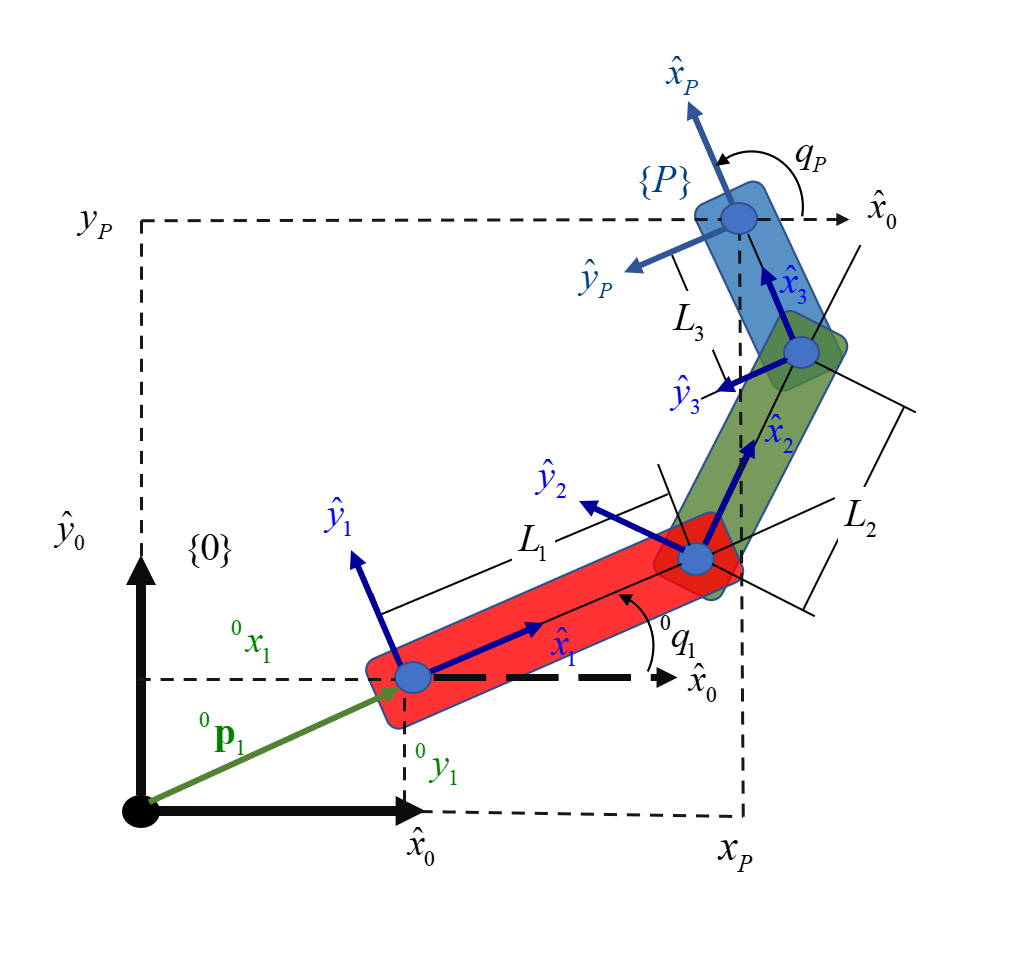
</p>


En la imagen anterior se observa la cadena cinemática a modelar, está conformada por 3 eslabones, cada uno de ellos tiene dos puntos. Cada uno de los puntos, está asociado a una junta rotacional que limita el movimiento de los eslabones. En el tercer eslabón se debe plantear un punto P, o punto solución del sistema, este será el que interactúa con el entorno.

# <span style="color:rgb(213,80,0)">Modelo cinematico de la postura:</span>

El modelo cinematico de la postura es aquel que ayuda a describir la posición y orientación de algún elemento dentro de la cadena cinemática que lo conforma.

### Planteamiento del modelo cinemático de la posición

Para esto se deben plantear lo siguiente:

1.  De acuerdo al diagama anterior establecer un sistema de referencia inercial cero.
2. Posteriormente establecer sistemas relativos en cada junta para describir las relaciones de orientación y orientación de cada eslabón.
3. Se tendrá además un punto P, con un sistema de referencia relativo asociado, que sirve para indicar la posición y orientación elemento que interactúa con el entorno. Para facilitar el análisis, este tendrá la misma orientación que el sistema de referencia asociado al eslabón 3.

Para modelar el sistema se debe establecer una transformación homogénea, esta está compuesta por una matriz de rotación y un vector de posición. La matriz de rotación únicamente tendrá rotación alrededor del plano $Z_0$ . Mientras que el vector de posición, sólo tendrá componentes sobre el plano $\textrm{xy}$ .

### Transformación del sistema {0} al sistema {1}:

Esta relaciona la posición y orientación del sistema relativo {1} respecto al sistema inercial {0}. Está compuesta por el vector de posición, en él se incluyen las coordenadas de $x$ *y* $y$ . La coordenada en $z$ será nula debido a que este vector se encuentra sobre el plano $\textrm{xy}$ . Para la matriz de rotación se utiliza la variable $\theta$ , esta tiene como referencia el vector de origen $x_0$ .


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1
T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)

### Transformación del sistema {1} al sistema {2}:

Del mismo modo, esta transformación se compone del vector de posición y la matriz de rotación para relacionar el sistema {2} respecto al sistema {1}. El vector de posición describe la posición del origen del sistema {2} con respecto al sistema {1}, y está compuesto por la traslación sobre el eje ${\hat{x} }_1$ una distancia $L_1$ .


Por otro lado, la matriz de rotación utiliza la variable θ para medir el ángulo entre el vector ${\hat{x} }_1$ y ${\hat{x} }_2$ .


In [3]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)

### Transformación del sistema {2} al sistema {3}:

En la tercera transformación, el vector de posición, describe la posición de origen del sistema {3} con respecto a {2}. Este está compuesto por la traslación sobre el eje  ${\hat{x} }_2$ una distancia $L_2$ .


Con la variable correspondiente θ es posible medir el ángulo entre que existe entre el vector  ${\hat{x} }_2$ y  ${\hat{x} }_3$ .


In [4]:
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)

### Transformación del sistema 3 al sistema P:

Para esta última se considera el sistema {3} y el sistema {P}. Mediante el vector de posición es posible describir la posición de origen del sistema {P} con respecto al sistema {3}. El ángulo asociado a la variable θ se mide entre el vector  ${\hat{x} }_P$ y  ${\hat{x} }_3$ . Sin embargo, como se había mencionado anteriormente tanto el sistema {P} como el sistema {3} tienen la misma orientación, por lo que el ángulo entre estos vectores será nulo. Esto implica que la matriz de rotación se reduzca a la matriz identidad, como se muestra a continuación.


In [5]:
T_3_P = Tij(L_3,0,0,0,0,0)

### Transformación del sistema P respecto al sistema 0:

Finalmente, se tiene una transformación que relaciona el punto P asociado al sistema {P} con el sistema inercial {0}. Este describe las posiciones de rotación y orientación del vector final con respecto al sistema inercial en función de la postura de los eslabones que conforman la estructura mecánica y puede entenderse como el producto entre todas las transformaciones homogéneas asociadas a los eslabones.


$$T_{0,P} =T_{0,1} T_{1,2} T_{2,3}$$


In [6]:
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)


A partir de ello se obtiene el vector de posición y el vector de orientación del sistema {P} con respecto a {0}.


In [7]:
P_O_P=[x_O_1 + L_2*cos(theta_1_2 + theta_O_1) + L_1*cos(theta_O_1) + L_3*cos(theta_1_2 + theta_2_3 + theta_O_1); y_O_1 + L_2*sin(theta_1_2 + theta_O_1) + L_1*sin(theta_O_1) + L_3*sin(theta_1_2 + theta_2_3 + theta_O_1)]

In [8]:
theta_O_P=(theta_O_1+theta_1_2+theta_2_3)


La orientación P es la suma de los ángulos de orientación de cada una de las juntas rotacionales debido a que la matriz de rotación está expresada en proyecciones.

### Vector de postura del robot

El vector de postura del robot está en función del conjunto de variables que describen la postura de cada una de las juntas de la cadena cinemática, es decir, de las variables de configuración del sistema.


$$q=\left\lbrace \theta_{0,1} ,\theta_{1,2} ,\theta_{2,3} \right\rbrace$$

La matriz mostrada a continuación es entonces el modelo cinemático de postura del robot.


In [9]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]

### Restricciones cinemáticas de postura

Cuando un robot realiza una tarea la posicion y orientacion pueden ser descritas a partir de un sistema inercial {0} mediante un conjunto de coordenadas, a esto se le conoce como vector de pose. Cuando el vector esté descrito mediante variables de configuración se le denomina vector de postura.


***Vector de postura***


$${}^0{\xi }_P\left(q\right)=\left\lbrack \begin{array}{c} {}^0p_P\left(q\right)\newline {}^0{\theta }_P\left(q\right) \end{array}\right\rbrack$$

***Vector de pose***


$${}^0{\xi }_P\left(q\right)=\left\lbrack \begin{array}{c} {}^0p_P\newline {}^0{\theta }_P \end{array}\right\rbrack =\left\lbrack \begin{array}{c} {}^0x_P\newline {}^0y_P\newline {}^0{\theta }_P \end{array}\right\rbrack$$


Sin embargo, ambos vectores describen al sistema {P} de la misma manera. La equivalencia entre ambas expresiones será entonces las restricciones cinemáticas de la postura, o bien, modelo de restricciones cinemáticas de la postura del robot


$$^0 {{\xi }}_P =^0 {{\xi }}_P (q)$$


A partir de este modelo se obtendrán los modelos de velocidad y aceleración.

### Modelo cinemático directo de las velocidades

El modelo cinemático directo de las velocidades de un robot describe la manera en que las velocidades asociadas a cada uno de los ángulos de las articulaciones se expresan como velocidad lineal y angular.


Para obtenerlo, se debe derivar con respecto al tiempo ambos extremos de la ecuación de restricciones cinemáticas obtenida del modelo anterior.  Sin embargo, estos no se encuentran expresados en función del tiempo, por lo que deberán derivarse de manera absoluta y seguir la regla de la cadena.


$$\frac{d}{dt}\left(^0 {{\xi }}_P \right)=\frac{d}{dt}\left(^0 {{\xi }}_P (q)\right)$$

El resultado del lado izquierdo corresponde a las restricciones cinemáticas de las velocidades, es decir, las velocidades lineales y angulares con las cuales se mueve el vector asociado a P con referencia al sistema inercial {0}.


$$\frac{d}{dt}^0 {{\xi }}_P =\frac{\partial }{\partial ^0 {{\theta }}_1 }^0 {{\xi }}_P (q)^0 {\dot{{\theta }} }_1 +\frac{\partial }{\partial ^1 {{\theta }}_2 }^0 {{\xi }}_P (q)^1 {\dot{{\theta }} }_2 +\frac{\partial }{\partial ^2 {{\theta }}_3 }^0 {{\xi }}_P (q)^2 {\dot{{\theta }} }_3$$

Por otro lado, como el extremo derecho se encuentra en función del vector de variables de configuración el resultanto será el producto entre la matriz jacobiana por un vector cuyos elementos son las derivadas con respecto a cada una de las variables de configuración.


$$\frac{d}{\mathrm{dt}}{}^0{\zeta }_P=\left\lbrack \begin{array}{ccc} \frac{\partial }{\partial {}^0{\theta }_1}{}^0{\xi }_P\left(q\right) & \frac{\partial }{\partial {}^1{\theta }_2}{}^0{\xi }_P\left(q\right) & \frac{\partial }{\partial {}^2{\theta }_3}{}^0{\xi }_P\left(q\right) \end{array}\right\rbrack \left\lbrack \begin{array}{c} \overset{\cdot }{{}^0{\theta }_1} \newline \overset{\cdot }{{}^1{\theta }_2} \newline \overset{\cdot }{{}^2{\theta }_3}  \end{array}\right\rbrack$$

In [10]:
syms J_theta

J_theta

In [11]:
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])


El resultado final será la matriz jacobiana del sistema y el vector que contiene a las derivadas se le conoce como el vector de velocidades generalizadas del sistema.


$$\overset{\cdot }{{}^0{\xi }_P} =J_{\theta \;} \left(q\right)\overset{\cdot }{q}$$
### Modelo cinemático inverso de las velocidades

Para obtener el modelo cinemático inverso de las velocidades es necesario despejar del modelo cinemático directo el vector de velocidades generalizadas. Los elementos que componen a la matriz jacobiana están en función de la postura de cada una de las juntas del robot.


Este es utilizado para cuando se tiene como entrada la posición y orientación que se desea que tenga el robot, y se necesitan conocer las velocidades lineal y angular que deben tener los motores asociados a cada junta.


$$\overset{\ldotp }{q} =J_{\theta \;}^{-1\;} \left(q\right)\overset{\cdot }{{}^0{\xi }_P}$$

De esta manera se procede a obtener el inverso del Jacobiano.


In [12]:
inv(J_theta)


El modelo inverso de las velocidades será el siguiente:


$$\overset{\ldotp }{q} =\left(\begin{array}{ccc} \frac{\cos \left(\theta_{1,2} +\theta_{O,1} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)} & \frac{\sin \left(\theta_{1,2} +\theta_{O,1} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)} & \frac{L_3 \,\sin \left(\theta_{2,3} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)}\newline -\frac{L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)} & -\frac{L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\sin \left(\theta_{O,1} \right)}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)} & -\frac{L_3 \,{\left(L_1 \,\sin \left(\theta_{1,2} +\theta_{2,3} \right)+L_2 \,\sin \left(\theta_{2,3} \right)\right)}}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)}\newline \frac{\cos \left(\theta_{O,1} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} & \frac{\sin \left(\theta_{O,1} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} & \frac{L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} \right)+L_2 \,\sin \left(\theta_{1,2} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} \end{array}\right)\left\lbrack \begin{array}{c} \overset{\ldotp }{{}^0x_P} \newline \overset{\ldotp }{{}^0y_P} \newline \overset{\ldotp }{{}^0{\theta \;}_P}  \end{array}\right\rbrack$$
### Modelo cinemático de las aceleaciones

Es posible obtener el modelo cinemático de las aceleraciones utilizando los modelos anteriores. Se deriva con respecto al tiempo el modelo de velocidades aplicando la regla de la cadena para obtener la derivada absoluta.


$$\overset{\cdot \cdot }{{}^0{\xi }_P} =\overset{\cdot }{J_{\theta \;} } \left(q\right)\overset{\cdot }{q} +J_{\theta \;} \left(q\right)\overset{\cdot \cdot }{q}$$

Obteniendo la derivada de la matriz Jacobiana:


In [13]:
J_theta_dot = diff(J_theta)


Por lo que el modelo directo de las aceleraciones se muestra a continuación:


$$\overset{\cdot \cdot }{{}^0{\xi }_P} =\left\lbrack \begin{array}{ccc} -L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline 0 & 0 & 0 \end{array}\right\rbrack \left\lbrack \begin{array}{c} \overset{\cdot }{{\theta \;}_{0,1} } \newline \overset{\cdot }{{\theta \;}_{1,2} } \newline \overset{\cdot }{{\theta \;}_{2,3} }  \end{array}\right\rbrack +\left\lbrack \begin{array}{ccc} -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_1 \,\sin \left(\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)+L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline 1 & 1 & 1 \end{array}\right\rbrack \left\lbrack \begin{array}{c} \overset{\cdot \cdot }{{\theta \;}_{0,1} } \newline \overset{\cdot \cdot }{{\theta \;}_{1,2} } \newline \overset{\cdot \cdot }{{\theta \;}_{2,3} }  \end{array}\right\rbrack$$
### Modelo cinemático inverso de las aceleraciones:

De la misma forma, para obtener el modelo inverso se debe derivar el modelo cinemático inverso de las velocidad a ambos lados y respecto al tiempo, utilizando la regla de la cadena. Esto dará como resultado lo siguiente:


$$\overset{\cdot \cdot }{q} =\overset{\cdot }{J_{\theta \;}^{-1\;} \left(q\right)} \overset{\cdot }{{}^0{\xi }_P} +J_{\theta \;}^{-1\;} \left(q\right)\overset{\cdot \cdot }{{}^0{\xi }_P}$$

# <span style="color:rgb(213,80,0)">Modelo dinámico por ecuaciones de Eüler\-Lagrange</span>

### Principio de mínima acción:

Este dice que la cantidad de energía cuando un cuerpo se mueve siempre permanece constante.


En un robot, al contar con elementos externos, estos modifican la energía y por ende la relación que hay entre la energía cinética y potencial del cuerpo, por lo que no permanece constante. Este cambio de energía causará trabajo (W). El lagrangeano, se define entonces como la diferencia entre la energía cinética y potencial del robot. Y ayuda a determinar la cantidad de trabajo que realiza un cuerpo empleando la ecuación del par.


In [14]:
syms k(i) u(i) n
Gamma = symsum(k(i), i, 1, n) - symsum(u(i), i, 1, n)


Empleando esta diferencia y la ecuación de par se pueden obtener los


pares en los actuadores en el robot.

#### Ecuación del par

$$\tau_i =\frac{d}{dt}\left(\frac{\partial }{\partial \dot{q_i } }\left(\Gamma \right)\right)-\left(\frac{\partial \:}{\partial \:q_i }\left(\Gamma \:\right)\right)$$

Se emplearan las siguientes ecuaciones para el cálculo de la energía cinética y potencial del sistema respectivamente.


$$k_i =\frac{m_i }{2}v_{C_i }^T v_{C_i } +\frac{1}{2}{{\omega }}_{C_i }^T I_{C_i } {{\omega }}_{C_i }$$

$$u_i =-m_i {\mathit{\mathbf{g}}}^{T\;0} P_{\textrm{ci}}$$

<p style="text-align:left">
   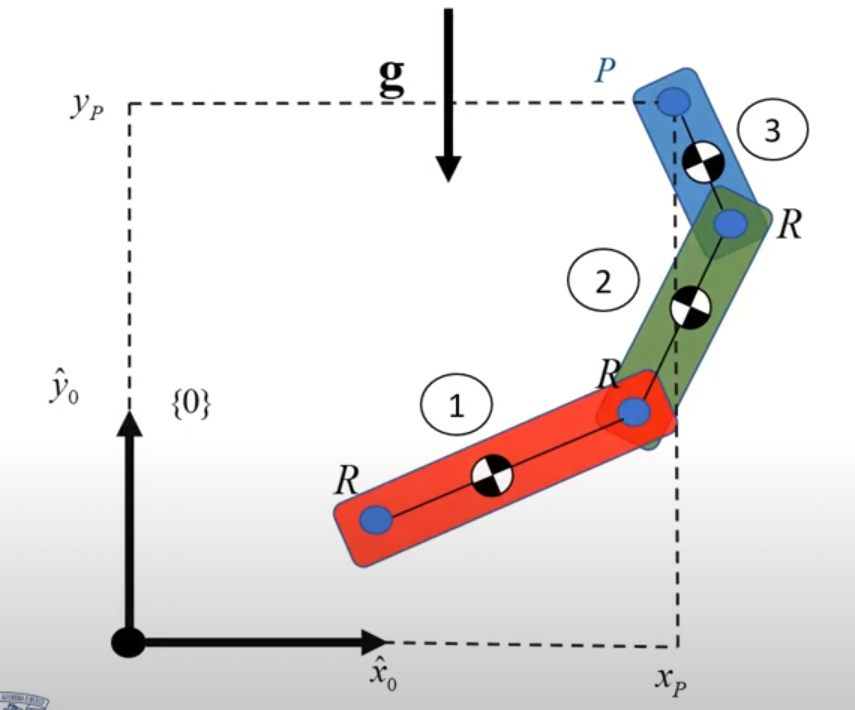
</p>


Además se tomarán en cuenta las siguientes consideraciones:

1.  Los centros de masa de cada eslabón se ubican exactamente a la mitad.
2. La forma geométrica del eslabón es de un prisma rectangular.
3. La gravedad se considera negativa sobre el eje y.

Para calcular el lagrangeano es necesario conocer las velocidades lineales, las velocidades angulares y las posiciones de los centros de masa.


In [15]:
syms x_1_C1 theta_dot_O_1

v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]

In [16]:

v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]

In [17]:
transpose(v_C1_C1)*v_C1_C1

In [18]:
simplify(transpose(v_O_C1)*v_O_C1)


## Cálculo de la posición de los centros de masa

La posición de los centros de masa será calculada para cada eslabón del robot respecto al sistema inercial {0}. Se considera un sistema coincidente sobre el eje $x$ para facilitar el análisis.


Una vez hecho esto, se definen las coordenadas que serán el centro de masa para cada eslabón, $x_{1,\textrm{C1}}$ para el primer eslabón y respecto al sistema de referencia {1}, $x_{2,\textrm{C2}} \;$ para el segundo eslabón y respecto al sistema de referencia {2} y $x_{3,\textrm{C3}}$ para el tercer eslabón y respecto al sistema de referencia {3}.


Posteriormente se colocan sistemas de referencia sobre cada centro de masa, ubicando los ejes de manera paralela a los del sistema de referencia de la junta.

<p style="text-align:left">
   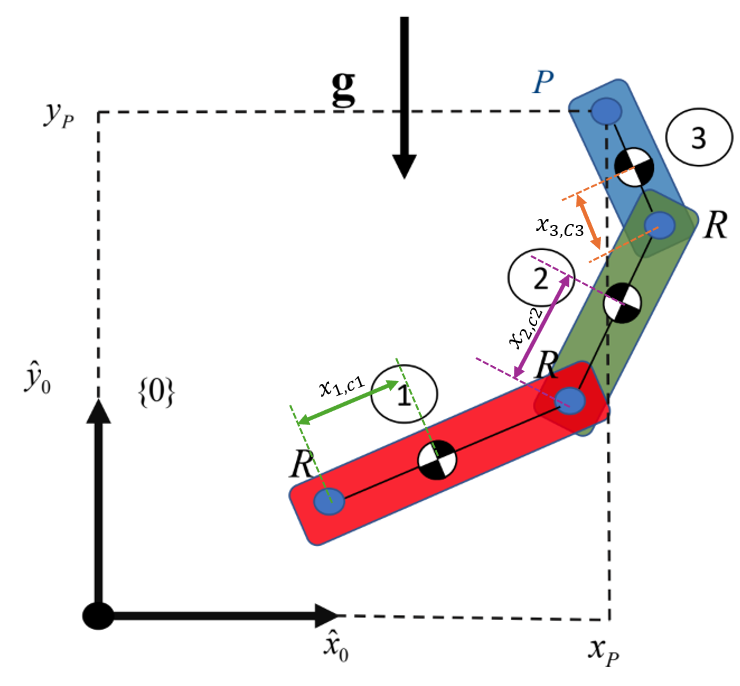
</p>


Los centros de masa serán calculados mediante transformaciones homogéneas.

#### Tranformación del centro de masa 1

La primera transfromación que se debe calcular es la que va del sistema asociado a $C_1$ con respecto al sistema {0}. Esto se realiza con la siguiente expresión.


$${}^0T_{\textrm{C1}}={}^0T_1{}^1T_{\textrm{C1}}$$

Sin embargo, como $C_1$  se encuentra sobre el eje $x$ este no presenta rotación, por lo que esta matriz será la matriz identidad.


In [19]:
syms x_1_C1 x_2_C2 x_3_C3

T_1_C1 = Tij(x_1_C1,0,0,0,0,0)

In [20]:
T_O_C1 = T_O_1*T_1_C1

#### Transformación del centro de masa 2

De igual forma se puede obtener mediante transformaciones homogéneas que relacionen el centro de masa $C_2$ respecto al sistema {0}.


La expresión utilizada será la siguiente:


$${}^0T_{\textrm{C2}}={}^0T_1{}^1T_2{}^2T_{\textrm{C2}}$$

In [21]:
T_2_C2 = Tij(x_2_C2,0,0,0,0,0)

In [22]:
T_O_C2 = T_O_1*T_1_2*T_2_C2

#### Transformación del centro de masa 3

Por último, se encuentra la transformación para el centro de masa $C_3$ . Este relaciona $C_3$ con el sistema {0} mediante la siguiente expresión.


$${}^0T_{\textrm{C2}}={}^0T_1{}^1T_2{}^2T_3{}^3T_{C3}$$

In [23]:
T_3_C3 = Tij(x_3_C3,0,0,0,0,0)

In [24]:
T_O_C3 = T_O_1*T_1_2*T_2_3*T_3_C3

In [25]:
%Vectores de posición
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]

In [26]:
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])

In [27]:

p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

## Cálculo de las velocidades

Se debe utilizar la ecuación de propagación de ecuaciones lineales y de velocidades angulares para trasladar los efectos cinemáticos de las velocidades de otros cuerpos a un sistema de referencia local asociado con un cuerpo en específico para realizar un análisis.


Estas ecuaciones cuentan con un superíndice y un subíndice. El primero indica el sistema de referencia del que son trasladados los efectos cinemáticos y el segundo de dónde provienen los efectos cinemáticos. Es decir, proyecta los efectos cinemáticos de un sistema anterior sobre un sistema siguiente.

##
## Cálculo de las velocidades lineales:

En el cálculo de las velocidades lineales estas dependen de la matriz de rotación que se obtuvo en el modelo de posición, el vector de velocidad lineal, el vector de velocidad angular y el vector de posición.


Esta es la proyección de la velocidad compuesta por la velocidad lineal, sumado a la velocidad del giro del eslabón anterior producto cruz con la distancia que hay entre el origen del sistema anterior con el sistema siguiente.


Este procedimiento se realiza para cada uno de los cuerpos presentes en la cadena cinemática.

#### Propagación del primer cuerpo:

Como la velocidad del sistema inercial {0} es nula debido a que se encuentra fijo, dando como resultado que la propagación de velocidades en el cuerpo 1 sea un vector nulo.


In [28]:
syms v_1_1 v_2_2 v_3_3 v_P_P
%Propagación para el primer cuerpo
v_1_1

In [29]:
v_0_0=[0;0;0]

v_0_0 = 3x1
     0
     0
     0

In [30]:
p_0_1=[x_O_1;y_O_1;0]

In [31]:
%Ecuación de propagación
v_1_1 = R_1_O*(v_0_0+cross(omega_O_O,p_0_1))

#### Propagación del segundo cuerpo:

In [32]:
%Propagación para el segundo cuerpo
v_2_2

In [33]:
p_1_2=[L_1;0;0]

In [34]:
%Ecuación de propagación
v_2_2 = simplify(R_2_1*(v_1_1+cross(omega_1_1,p_1_2)))


#### Propagación del tercer cuerpo:

In [35]:
%Propagación para el segundo cuerpo
v_3_3

In [36]:
p_2_3=[L_2;0;0]

In [37]:
%Ecuación de propagación
v_3_3 = simplify(R_3_2*(v_2_2+cross(omega_2_2,p_2_3)))


#### Propagación sobre sistema {P}

In [38]:
%Propagación para el segundo cuerpo
v_P_P

In [39]:
p_3_P=[L_3;0;0]

In [40]:
R_P_3=eye(3)

R_P_3 = 3x3
     1     0     0
     0     1     0
     0     0     1

In [41]:
%Ecuación de propagación
v_P_P = simplify(R_P_3*(v_3_3+cross(omega_3_3,p_3_P)))

In [42]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3

In [43]:
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3

In [44]:
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3

#### Cálculo de la velocidades angulares:
#### Propagación primer cuerpo:

Propagración de velocidades entre el sistema {0} al sistema {1}


Para este primer caso como el sistema inercial {0} es fijo no tiene velocidad ni angular ni lineal, entonces la velocidad de rotación depende únicamente a los efectos de giro propios del sistema {1}.


Las matrices de rotación por su parte serán obtenidas del modelo cinemático de la postura mencionado en secciones anteriores.


In [45]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1

In [46]:
omega_O_O = [0;0;0]

omega_O_O = 3x1
     0
     0
     0

In [47]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1

In [48]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [49]:
R_1_O = transpose(R_O_1)

In [50]:

%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1

#### Propagación segundo cuerpo:

Se realiza de manera similar para el segundo cuerpo. En este se proyecta la velocidad angular del sistema {1} sobre el sistema {2}


In [51]:
%Propagación para el segundo cuerpo
omega_2_2

In [52]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1

In [53]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [54]:
R_2_1 = transpose(R_1_2)

In [55]:

%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2


#### Propagación del tercer cuerpo:

En este se proyecta la velocidad angular del sistema {2} sobre el sistema {3}.


In [56]:
%Propagación para el tercer cuerpo
omega_3_3

In [57]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1

In [58]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [59]:
R_3_2 = transpose(R_2_3)


#### Propagación sobre sistema {P}

Como este sistema no está asociado a ninguna junta y permanece fijo entonces la propagación será nula y gira a la misma velocidad que el sistema {3}.


In [60]:
%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3

In [61]:
v_O_C3

## Definición de los elementos de inercia

Algunas de las consideraciones que hay que hacer es que los eslabones son cuerpos rígidos ideales. Además, su forma es de prisma rectangular, de ahí es posible calcular la matriz de inercia de cada eslabón. Esto servirá para encontrar la energía cinética y potencial en los eslabones.

<p style="text-align:left">
   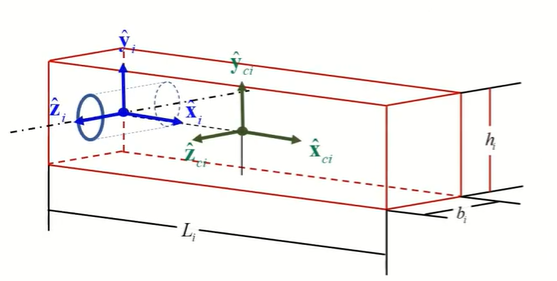
</p>


In [62]:
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3
%vector de gravedad

g_v = [0;-g;0]

In [63]:

I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]

In [64]:
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]

In [65]:
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]

### Cálculo de energía cinética

Recordando que la expresión para calcular la energía cinética es la que se muestra a continuación, se deben obtener cada uno de los componentes involucrados.


$$k_i =\frac{m_i }{2}v_{C_i }^T v_{C_i } +\frac{1}{2}{{\omega }}_{C_i }^T I_{C_i } {{\omega }}_{C_i }$$
#### Velocidad en los centros de masa:

Comenzando por la velocidad en los centros de masa, esta se calcula estableciendo un sistema de referencia en el centro de masa en el que los ejes de este serán paralelos al sistema correspondiente. Posteriormente, se utiliza la expresión de propagación de velocidades pero esta vez respecto al centro de masa asociado.

#### Velocidad centro de masa 1

In [66]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

v_O_C1 = diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3

#### Velocidad centro de masa 2

In [67]:
v_O_C2 = diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3

#### Velocidad centro de masa 3

In [68]:
v_O_C3 = diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3


Una vez hecho esto se puede calcular la energía cinética en cada uno de los cuerpos.

#### Energía cinética cuerpo 1.

In [69]:
syms m_1 m_2 m_3
%energía cinética de cada uno de los cuerpos

k_1 = simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)

#### Energía cinética cuerpo 2.

In [70]:
k_2 = simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)

#### Energía cinética cuerpo 3.

In [71]:
k_3 = simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3)

### Cálculo energía potencial

Retomando la expresión para calcular la energía potencial y haciendo uso de los elementos que ya se calcularon anteriormente se procede a sustituirlos para calcular la energía en cada cuerpo.


$$u_i =-m_i {\;\mathit{\mathbf{g}}}^{T\;0} P_{\mathrm{ci}}$$
#### Energía potencial cuerpo 1.

In [72]:
% Cáclulo de la energía potencial de cada cuerpo

u_1 = -m_1*transpose(p_O_C1)*g_v

#### Energía potencial cuerpo 2.

In [73]:
u_2 = -m_2*transpose(p_O_C2)*g_v

#### Energía potencial cuerpo 3.

In [74]:
u_3 = -m_3*transpose(p_O_C3)*g_v

#### Cálculo del Lagrangeano

Una vez obtenidos los valores de la energía cinética y potencial de cada uno de los eslabones del robot es posible calcular el Lagrangeano. Esto permite obtener el par en cada junta.


In [75]:

La = (k_1+k_2+k_3)-(u_1+u_2+u_3)

## Cálculo de los pares

Ahora se debe calcular el par en cada una de las juntas como se muestra en el diagrama.

<p style="text-align:left">
   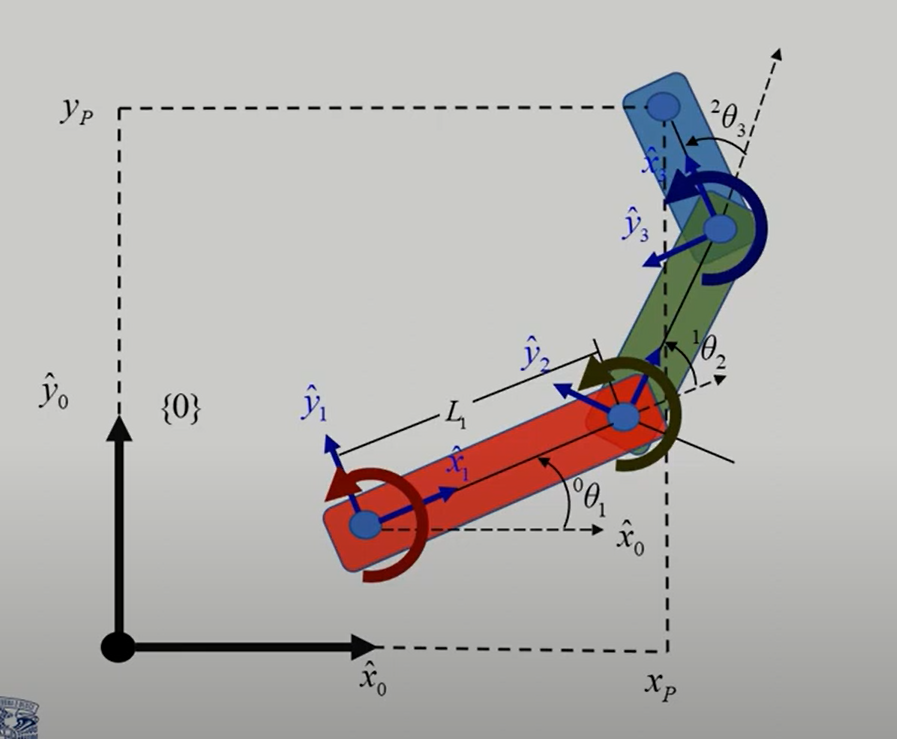
</p>


La expresión mostrada a continuación se utiliza para calcular el par en cada junta y da como resultado una magnitud escalar.


$$\tau_i =\frac{d}{dt}\left(\frac{\partial }{\partial \dot{q_i } }\left(\Gamma \right)\right)-\left(\frac{\partial \:}{\partial \:q_i }\left(\Gamma \:\right)\right)$$

A raíz de que esta expresión debe ser derivada con respecto al tiempo, se debe derivar cada una de las variables que describen el estado cinemático del robot. El otro elemento corresponde a los pares producidos por efectos de la gravedad y la posición relativa entre la referencia energética y el centro de masa de los eslabones.


In [76]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

D_theta1 = diff(La,theta_dot_O_1)

#### Par en junta 1.

In [77]:
% Cálculo de relación

tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1)

In [78]:

D_theta2 = diff(La,theta_dot_1_2)

#### Par en junta 2.

In [79]:
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2)

In [80]:

D_theta3 = diff(La,theta_dot_2_3)

#### Par en junta 3.

In [81]:
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3)

#### Vector de pares

Otra manera de representar los pares del robot es mediante el vector de pares, este expresa mediante la siguiente distribución.


$${{\tau }}_{\theta } =\left(\begin{array}{c} \tau_{\theta 1} \newline \tau_{\theta 2} \newline \tau_{\theta 3}  \end{array}\right)=M(q)\,\ddot{q} +V(q,\dot{q} )+G(q)$$

En donde el primer término $M(q)\,\ddot{q}$  es la matriz de inercia, es simétrica y definida positiva. En los elementos de su traza se encuentran las inercias que deben vencer directamente los actuadores sobre las juntas.


El segundo término $V(q,\dot{q} )$ es el vector de pares de Coriolis, contiene los pares generados debido a la relatividad de velocidades sobre cada sistema de referencia.


Por último, el vector de pares de gravedad $G(q)$ donde todos sus elementos se ven afectados por el valor de la gravedad.


A este se le conoce como el modelo dinámico directo del robot, de este se conocen los pares $\tau$ , las posiciones $q$  y las velocidades $\overset{\ldotp }{q}$ y se necesita obtener la aceleración $\overset{\ldotp \ldotp }{q}$ .


$${{\tau }}_{\theta } =M(q)\,\ddot{q} +V(q,\dot{q} )+G(q)$$

Despejando:


$$\ddot{q} =M(q)^{-1} \left(\tau -V(q,\dot{q} )~-G(q)\right)$$

In [82]:
tao = [tao_1;tao_2;tao_3]

#### Cálculo de la matriz de inercia

In [83]:
% Cálculo de la matriz de inercia

M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])

In [84]:
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])

In [85]:
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])

In [86]:

M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])

#### Cálculo del vector de pares

In [87]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])

In [88]:
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])

## Modelo dinámico inverso

Se retoma la expresión anterior, sin embargo para el modelo dinámico inverso se conocen las trayectorias deseadas $q\left(t\right)$ , las velocidades $\overset{\ldotp }{q\left(t\right)}$ y aceleraciones $\overset{\ldotp \ldotp }{q\left(t\right)}$ y se desea calcular el torque necesario $\tau$


$${{\tau }}_{\theta } =M(q)\,\ddot{q} +V(q,\dot{q} )+G(q)$$
# <span style="color:rgb(213,80,0)">Conclusión:</span>

En conclusión, el modelado cinemático y dinámico de un robot SCARA de tres articulaciones es una de las bases fundamentales en el estudio de la robótica. Comprender este proceso y la manera en que se representa matemáticamente desde varias perspectivas como son el movimiento (cinemática) y la interacción que tiene con el par(dinámica) es esencial tanto para el entendimiento teórico del sistema como para el desarrollo de simulaciones, sistemas de control y predicción de errores en entornos reales.


Debido a que el objetivo general del modelo cinemático directo es establecer relaciones entre los ángulos de las juntas con respecto a la posición y orientación, este modelo será muy útil cuando se tiene como se necesita determinar en dónde se encuentra el punto P de acuerdo a los ángulos asociados. Por otro lado, si se tiene la posición deseada y se necesita conocer los ángulos asociados el modelo inverso será una mejor opción.


El modelo dinámico por su parte, se enfoca en analizar las fuerzas y pares necesarios para generar un comportamiento deseado, por lo que permite determinar el comportamiento del sistema de acuerdo al par aplicado(directo), o bien, calcular los torques requeridos para lograr el movimiento deseado.


Modelar un robot RRR no solo es resolver ecuaciones complejas, sino entender el lenguaje matemático que rige el comportamiento del robot. Una vez que se comprende y dominan estas herramientas matemáticas se vuelve más sencillo predecir el comportamiento y por ende diseñar sistemas más seguros y eficientes.




